In [6]:
# 2a)
import numpy as np
import pandas as pd

path = "/home/user/Documents/School Stuff/US2025/SWE2020/past papers/wine.csv"
df = pd.read_csv(filepath_or_buffer = path, header = 0)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0,1


In [7]:
# b)
df.data = df[['density', 'sulfates', 'residual_sugar']]
df.target = df[['high_quality']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.2, random_state = 42)

df.target.tail()

/tmp/ipykernel_4725/1284717190.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.data = df[['density', 'sulfates', 'residual_sugar']]
/tmp/ipykernel_4725/1284717190.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = df[['high_quality']]


,high_quality
6492,0
6493,0
6494,0
6495,1
6496,0


In [12]:
# c)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model accuracy: {model.score(df.data, df.target):.2f}")

/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.4_1/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model accuracy: 0.83


/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.4_1/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.4_1/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.4_1/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/linuxbrew/.linuxbrew/Cellar/python@3.11/3.11.4_1/lib/python3.11/site-package

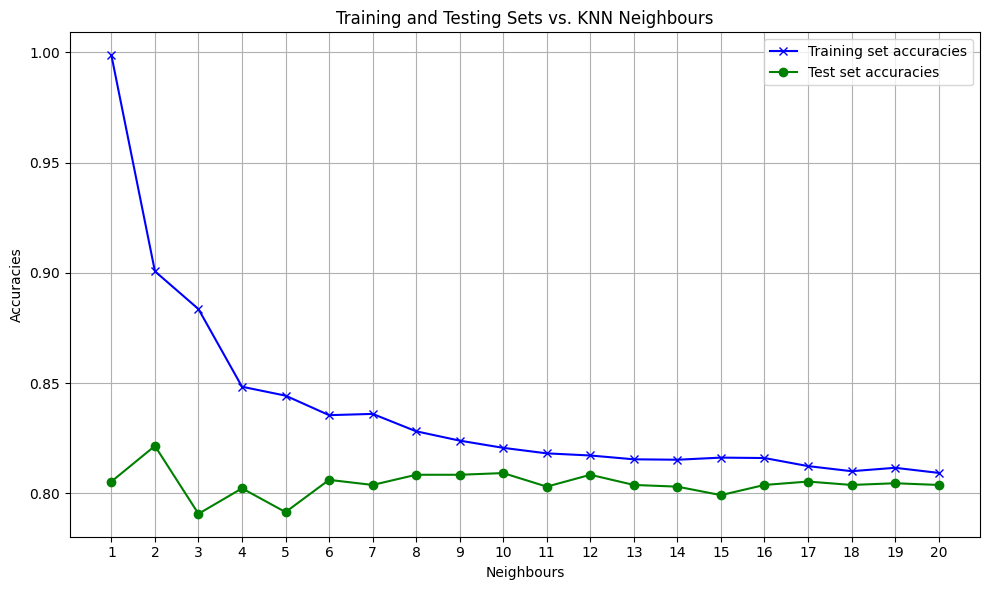

In [15]:
# d)
neighbors = range(1, 21)
training_set_accuracies = []
test_set_accuracies = []

for n in neighbors:
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)

    training_set_accuracies.append(model.score(X_train, y_train))
    test_set_accuracies.append(model.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
plt.title("Training and Testing Sets vs. KNN Neighbours")
plt.xlabel("Neighbours")
plt.ylabel("Accuracies")
plt.plot(neighbors, training_set_accuracies, label = "Training set accuracies", color = "Blue", marker = "x")
plt.plot(neighbors, test_set_accuracies, label = "Test set accuracies", color = "Green", marker = "o")
plt.legend()
plt.grid(True)
plt.xticks(neighbors)
plt.tight_layout()
plt.show()

In [19]:
# 3a)
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples = 11)

In [20]:
# b)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [24]:
# c)
model = LinearRegression()
model.fit(X_train, y_train)
slope = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Coefficient: {slope}")

Intercept: -0.3314157300791454
Coefficient: [0.41696719]


In [26]:
# d)
print(f"Model accuracy: {model.score(X, y):.3f}")
print(f"Training set accuracy: {model.score(X_train, y_train):.3f}")
print(f"Test set accuracy: {model.score(X_test, y_test):.3f}")

Model accuracy: 0.602
Training set accuracy: 0.601
Test set accuracy: 0.338


In [29]:
# e)
print(f"Predictions: {model.predict(X_test)}")

Predictions: [-1.19204971 -0.64529165  0.18914089]
